In [3]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [4]:
NUM_OF_PARTIES = 20
ROUNDS = 150
EPOCHS = 3

dataset='femnist'

In [5]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-11T13:06:06.301Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-11T13:06:06.301Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-11T13:06:06.302Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-11T13:06:06.302Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-11T13:06:06.676Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-11T13:06:06.677Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-11T13:06:06.678Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-11T13:06:06.678Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-11T13:06:55.105Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-11T13:06:55.106Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-11T13:06:55.107Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-11T13:06:55.108Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:06:55] "POST /6 HTTP/1.1" 200 -
2021-06-11T13:06:58.236Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-11T13:06:58.237Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-11T13:06:58.238Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-11T13:06:58.240Z | 1.0.5 | INFO | werkzeug                               

In [6]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-11T13:07:31.242Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-11T13:07:31.243Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-11T13:07:31.244Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-11T13:07:31.244Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:07:31.245Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:07:31.853Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T13:07:31.854Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:07:31.855Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:07:31.855

2021-06-11T13:08:57.056Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:08:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:08:57.102Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:08:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:08:57.144Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:08:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:08:57.146Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T13:08:57.152Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:08:57.153Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:08:57.264Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f

2021-06-11T13:09:41.071Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:09:41.072Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T13:09:41.073Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:09:41.073Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:09:41.127Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f984209d0b8>
2021-06-11T13:09:41.128Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:09:41.128Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:09:43.190Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-11T13:10:23.500Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:10:23.554Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f985d3d3978>
2021-06-11T13:10:23.555Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:10:23.556Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:10:26.127Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T13:10:26.128Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:10:26.130Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:10:26.131Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-11T13:11:06.249Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:11:08.849Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T13:11:08.850Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:11:08.852Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:11:08.859Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T13:11:13.867Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T13:11:18.871Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T13:11:23.882Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T13

2021-06-11T13:11:51.021Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:11:51.023Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T13:11:56.034Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T13:12:01.038Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T13:12:06.044Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T13:12:11.051Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T13:12:16.054Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T13:12:21.058Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T13:12:26.0

2021-06-11T13:12:43.622Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T13:12:48.626Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T13:12:53.644Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T13:12:58.646Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T13:13:03.659Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T13:13:06.008Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:13:06.801Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:13:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:13:08.666Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 T

2021-06-11T13:13:40.920Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T13:13:45.926Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T13:13:50.931Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T13:13:54.174Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:13:54.242Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:13:54.281Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:13:54] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:13:54.337Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:13:54] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:13:54.426Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-11T13:14:33.081Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:14:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:14:33.466Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T13:14:35.742Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:14:35.785Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:14:35.788Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:14:35.842Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:14:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:14:35.879Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:14:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:14:35.916Z | 1.0.5 | 

2021-06-11T13:15:15.704Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:15:16.002Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:15:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:15:16.076Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:15:16.230Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T13:15:16.495Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:15:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:15:17.378Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:15:17.628Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:15:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:15:18.330Z | 1.0.5 | 

2021-06-11T13:16:02.210Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:16:02] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:16:02.244Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:16:02] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:16:02.327Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:02.338Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:02.342Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:02.355Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:02.360Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:02.363Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T13:16:43.939Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:16:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:16:43.940Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:43.969Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:43.971Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:44.007Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:44.009Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:16:44] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:16:44.010Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:16:44.045Z | 1.0.5 | INFO | werkzeug                

2021-06-11T13:17:25.955Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:17:25] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:17:25.956Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:17:25.992Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:17:25] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:17:25.993Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:17:26.063Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:17:26.064Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:17:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:17:26.065Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:17:26.066Z | 1.0.5 

2021-06-11T13:18:08.866Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:18:08.888Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:18:08.913Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:18:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:18:08.927Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:18:08.963Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:18:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:18:08.964Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:18:08.988Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:18:08.988Z | 1.0.5 | INFO | werkzeug                

2021-06-11T13:18:51.869Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:18:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:18:51.870Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:18:51.960Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:18:51.960Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:18:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:18:51.961Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:18:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:18:51.962Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:18:51.963Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:18:51.964Z | 1.0.5 

2021-06-11T13:19:34.145Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:19:34.146Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:19:34.147Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:19:34.148Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:19:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:19:34.149Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:19:34.186Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:19:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:19:34.187Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:19:34.189Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T13:20:18.393Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:20:18] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:20:18.393Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:20:18] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:20:18.415Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:20:18] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:20:18.416Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:20:18.449Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:20:18] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:20:18.450Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:20:18.452Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-11T13:21:00.039Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:21:00.040Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:21:00.041Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:21:00.043Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:21:00.045Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:21:00.084Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:21:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:21:00.133Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:21:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:21:00.154Z | 1.0.5 | INFO | werkzeug                

2021-06-11T13:21:43.117Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:21:43.131Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:21:43.153Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:21:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:21:43.168Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:21:43.189Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:21:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:21:43.224Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:21:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:21:43.295Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:21:43] "POST /7 HTTP/1.1" 200 -


2021-06-11T13:22:26.116Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:22:26.153Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:22:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:22:26.224Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:22:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:22:26.226Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:22:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:22:26.262Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:22:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:22:26.304Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:22:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:22:26.352Z | 1.0.5 | INFO | werkzeug                                         

2021-06-11T13:23:08.244Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:08.292Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:08.314Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:08.371Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:08.436Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:08.437Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:08.458Z | 1.0.5 | INFO | werkzeug        

2021-06-11T13:23:52.046Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:52.095Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:52.139Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:52.140Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:52.174Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:23:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:23:53.677Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:23:53.678Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-11T13:24:34.573Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:24:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:24:34.644Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:24:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:24:34.645Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:24:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:24:36.213Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:24:36.214Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T13:24:36.214Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:24:36.215Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:24:36.273Z | 1.0.5 | IN

2021-06-11T13:25:17.296Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:25:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:25:18.975Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:25:18.975Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T13:25:18.976Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:25:18.976Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:25:19.032Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f9841d616a0>
2021-06-11T13:25:19.033Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:25:19.034Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-11T13:26:01.632Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:26:01.632Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:26:01.686Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f98404727b8>
2021-06-11T13:26:01.687Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:26:01.688Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:26:03.849Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T13:26:03.851Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:26:03.852Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-11T13:26:44.006Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:26:44.007Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:26:46.327Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T13:26:46.328Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:26:46.329Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:26:46.330Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T13:26:51.338Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T13:26:56.342Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11

2021-06-11T13:27:28.740Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:27:28.742Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:27:28.743Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T13:27:33.750Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T13:27:38.758Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T13:27:43.783Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T13:27:48.786Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T13:27:53.790Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T13:27:58

2021-06-11T13:28:16.946Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T13:28:21.950Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T13:28:26.956Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T13:28:31.962Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T13:28:36.978Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T13:28:41.986Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T13:28:44.183Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:28:44.989Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:28:44] "POST /7 HTTP

2021-06-11T13:29:14.485Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T13:29:19.491Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T13:29:24.494Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T13:29:27.541Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:29:28.138Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:29:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:29:29.526Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T13:29:29.885Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:29:30.618Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-11T13:30:09.236Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:30:09.974Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:30:09] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:30:10.305Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:30:11.412Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:30:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:30:11.489Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:30:12.193Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:30:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:30:12.217Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:30:12.237Z | 1.0.5 

2021-06-11T13:30:58.318Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:30:58.362Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:30:58.424Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:30:58.425Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:30:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:30:58.468Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:30:58.469Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:30:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:30:58.485Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:30:58.506Z | 1.0.5 | INFO | werkzeug                

2021-06-11T13:31:40.682Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:31:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:31:40.986Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:31:41.071Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:31:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:31:41.107Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:31:41.114Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:31:41.117Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:31:41.130Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:31:41.142Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T13:32:20.671Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:32:21.023Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:32:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:32:21.024Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:32:21.306Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:32:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:32:21.511Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T13:32:22.382Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:32:22.444Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:32:22] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:32:22.454Z | 1.0.5 | 

2021-06-11T13:33:06.374Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:06.441Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:33:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:33:06.534Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:06.608Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:33:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:33:06.609Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:06.610Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:06.615Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:06.619Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T13:33:50.082Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:50.083Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:50.084Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:50.085Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:50.086Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:50.088Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:50.089Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:33:50.091Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-

2021-06-11T13:34:31.656Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:34:31] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:34:31.657Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:34:31.709Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:34:31] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:34:31.765Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:34:31] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:34:31.766Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:34:31.767Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:34:31] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:34:31.768Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-11T13:35:14.663Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:35:14.664Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:35:14.666Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:35:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:35:14.679Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:35:14.700Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:35:14.701Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:35:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:35:14.701Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:35:14.702Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T13:35:57.694Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:35:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:35:57.707Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:35:57.728Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:35:57.730Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:35:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:35:57.731Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:35:57.732Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:35:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:35:57.734Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:35:57.747Z | 1.0.5 

2021-06-11T13:36:40.137Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:36:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:36:40.138Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:36:40.139Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:36:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:36:40.198Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:36:40.199Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:36:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:36:40.220Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:36:40.233Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:36:40] "POST /7 HTTP/1.1" 200 -


2021-06-11T13:37:23.066Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:37:23.067Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:37:23.069Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:37:23.106Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:37:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:37:23.143Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:37:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:37:23.178Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:37:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:37:23.217Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:37:23] "POST /7 HTTP/1.1" 200 -


2021-06-11T13:38:05.427Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:05.497Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:05.498Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:05.535Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:05.590Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:05.611Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:05.679Z | 1.0.5 | INFO | werkzeug        

2021-06-11T13:38:49.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:49.118Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:49.162Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:49.197Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:49.234Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:49.270Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:38:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:38:49.308Z | 1.0.5 | INFO | werkzeug        

2021-06-11T13:39:32.973Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:39:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:39:32.999Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:39:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:39:33.048Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:39:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:39:33.071Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:39:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:39:33.106Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:39:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:39:33.143Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:39:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:39:34.074Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-11T13:40:14.635Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:40:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:40:14.658Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:40:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:40:14.690Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:40:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:40:14.724Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:40:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:40:17.125Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:40:17.126Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T13:40:17.127Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-11T13:40:57.740Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:40:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:40:57.776Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:40:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:40:59.866Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:40:59.867Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T13:40:59.867Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:40:59.867Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:40:59.921Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f98404638d0>
2021-06-11T13:40:59.922

2021-06-11T13:41:42.273Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:41:42.273Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T13:41:42.274Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:41:42.274Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:41:42.329Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f9841d7cac8>
2021-06-11T13:41:42.330Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:41:42.331Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:41:44.553Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-11T13:42:24.611Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:42:24.667Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f9842101ba8>
2021-06-11T13:42:24.668Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:42:24.669Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:42:27.502Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T13:42:27.514Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:42:27.516Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:42:27.523Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-11T13:43:07.646Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:43:10.453Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T13:43:10.455Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:43:10.456Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:43:10.458Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T13:43:15.462Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T13:43:20.466Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T13:43:25.470Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T13

2021-06-11T13:43:54.055Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:43:54.057Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T13:43:59.067Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T13:44:04.077Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T13:44:09.087Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T13:44:14.090Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T13:44:19.095Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T13:44:23.237Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:44:24

2021-06-11T13:44:46.850Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T13:44:51.859Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T13:44:56.862Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T13:45:01.870Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T13:45:06.875Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T13:45:10.727Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:45:11.830Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:45:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:45:11.878Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 T

2021-06-11T13:45:44.489Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T13:45:49.494Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T13:45:54.502Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T13:45:55.410Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:45:55.617Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:45:55.744Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:45:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:45:55.985Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:45:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:45:56.730Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-11T13:46:35.604Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:46:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:46:36.724Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:46:37.224Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:46:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:46:37.224Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T13:46:39.578Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:46:39.594Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:46:39.664Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:46:39] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:46:39.701Z | 1.0.5 | 

2021-06-11T13:47:21.725Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:47:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:47:22.190Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:47:22.285Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:47:22] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:47:22.287Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:47:22.295Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:47:22.361Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:47:22] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:47:22.362Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:47:22.376Z | 1.0.5 

2021-06-11T13:48:04.893Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:48:04] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:48:04.985Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:48:04] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:48:04.986Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:48:04.990Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:48:05.044Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:48:05.068Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:48:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:48:05.086Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:48:05.109Z | 1.0.5 

2021-06-11T13:48:44.836Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:48:44] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:48:45.323Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T13:48:46.562Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:48:46.637Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:48:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:48:46.890Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:48:46.906Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:48:47.000Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:48:47] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:48:47.001Z | 1.0.5 | 

2021-06-11T13:49:30.317Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:49:30.370Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:49:30.372Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:49:30] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:49:30.386Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:49:30.410Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:49:30.411Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:49:30] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:49:30.413Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:49:30.452Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T13:50:13.672Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:50:13] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:50:13.673Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:50:13] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:50:13.687Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:50:13.728Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:50:13] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:50:13.729Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:50:13.730Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:50:13] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:50:13.731Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-11T13:50:55.962Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:50:55.963Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:50:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:50:55.984Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:50:55.984Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:50:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:50:56.023Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:50:56] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:50:56.024Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:50:56.060Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:50:56.061Z | 1.0.5 

2021-06-11T13:51:37.979Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:51:38.047Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:51:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:51:38.048Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:51:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:51:38.049Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:51:38.050Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:51:38.051Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:51:38.053Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:51:38.055Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T13:52:20.691Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:52:20.692Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:52:20.693Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:52:20.695Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:52:20.696Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:52:20.697Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:52:20.698Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:52:20.749Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:52:20] 

2021-06-11T13:53:03.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:53:03.571Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:53:03] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:53:03.572Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:53:03.574Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:53:03.575Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:53:03.576Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:53:03.628Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:53:03] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:53:03.653Z | 1.0.5 | INFO | werkzeug                

2021-06-11T13:53:46.627Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:53:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:53:46.641Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:53:46.663Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:53:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:53:46.664Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:53:46.733Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:53:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:53:46.735Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:53:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:53:46.773Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13

2021-06-11T13:54:28.779Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:54:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:54:28.780Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:54:28.781Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T13:54:28.815Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:54:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:54:28.851Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:54:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:54:28.888Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:54:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:54:28.936Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13

2021-06-11T13:55:12.205Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:12.206Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:12.277Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:12.277Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:12.326Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:12.348Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:12.383Z | 1.0.5 | INFO | werkzeug        

2021-06-11T13:55:54.957Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:54] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:55.013Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:55.014Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:55.054Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:55.091Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:55:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:55:57.394Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:55:57.395Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-11T13:56:36.988Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:56:36] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:56:37.023Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:56:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:56:37.057Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:56:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:56:40.950Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:56:40.951Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T13:56:40.952Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:56:40.952Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:56:41.019Z | 1.0.5 | IN

2021-06-11T13:57:21.634Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 13:57:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T13:57:23.648Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T13:57:23.649Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T13:57:23.649Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:57:23.650Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:57:23.706Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f985d0b85c0>
2021-06-11T13:57:23.707Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:57:23.707Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-11T13:58:06.362Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T13:58:06.363Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T13:58:06.417Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f9840cdf6d8>
2021-06-11T13:58:06.417Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:58:06.418Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:58:08.690Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T13:58:08.692Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:58:08.693Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-11T13:58:48.799Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T13:58:48.799Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T13:58:51.899Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T13:58:51.900Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:58:51.904Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:58:51.906Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T13:58:56.914Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T13:59:01.928Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11

2021-06-11T13:59:35.015Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T13:59:35.017Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T13:59:35.022Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T13:59:40.035Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T13:59:45.039Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T13:59:50.046Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T13:59:55.050Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:00:00.055Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:00:05

2021-06-11T14:00:22.305Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T14:00:27.314Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T14:00:32.318Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T14:00:37.326Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:00:42.346Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:00:47.354Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T14:00:52.358Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T14:00:53.223Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:00:53.493

2021-06-11T14:01:20.622Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:01:25.627Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:01:30.048Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:01:30.723Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T14:01:30.727Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:01:30] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:01:33.544Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:01:33.859Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:01:34.005Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 

2021-06-11T14:02:16.246Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:02:16.248Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:02:17.480Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:02:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:02:17.490Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:02:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:02:18.016Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:02:18.361Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:02:18] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:02:18.776Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T14:02:19.324Z | 1.0.5 | 

2021-06-11T14:03:04.087Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:03:04.195Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:03:04] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:03:04.197Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:03:04.294Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:03:04] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:03:04.295Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:03:04.304Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:03:04.338Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:03:04.379Z | 1.0.5 | INFO | werkzeug                

2021-06-11T14:03:46.385Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:03:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:03:46.775Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:03:46.882Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:03:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:03:47.050Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:03:47.136Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:03:47] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:03:47.234Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:03:47.266Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:03:47.304Z | 1.0.5 

2021-06-11T14:04:29.550Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:04:29.562Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:04:29.582Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:04:29.630Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:04:29] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:04:29.631Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:04:29.667Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:04:29] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:04:29.669Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:04:29.715Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:05:12.049Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:12.051Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:12.073Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:05:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:05:12.074Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:12.079Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:12.151Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:12.153Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:12.154Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-11T14:05:55.533Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:05:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:05:55.570Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:05:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:05:55.571Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:55.597Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:55.619Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:05:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:05:55.628Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:55.671Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:05:55.672Z | 1.0.5 

2021-06-11T14:06:38.441Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:06:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:06:38.442Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:06:38.444Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:06:38.446Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:06:38.447Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:06:38.504Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:06:38.505Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:06:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:06:38.538Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:07:21.116Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:07:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:07:21.117Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:07:21.117Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:07:21.119Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:07:21.134Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:07:21.154Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:07:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:07:21.155Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:07:21.157Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:08:03.425Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:08:03] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:08:03.425Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:08:03.426Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:08:03.441Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:08:03.462Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:08:03] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:08:03.464Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:08:03.464Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:08:03.465Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:08:46.346Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:08:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:08:46.347Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:08:46.367Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:08:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:08:46.402Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:08:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:08:46.439Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:08:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:08:46.479Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:08:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:08:46.517Z | 1.0.5 | INFO | werkzeug                                         

2021-06-11T14:09:28.790Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:09:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:09:28.790Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:09:28.791Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:09:28.812Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:09:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:09:28.858Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:09:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:09:28.895Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:09:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:09:28.930Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14

2021-06-11T14:10:11.570Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:11.618Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:11.642Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:11.693Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:11.715Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:11.761Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:11.784Z | 1.0.5 | INFO | werkzeug        

2021-06-11T14:10:55.048Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:55.090Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:55.138Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:55.161Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:55.194Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:55.230Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:10:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:10:55.266Z | 1.0.5 | INFO | werkzeug        

2021-06-11T14:11:37.479Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:11:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:11:37.514Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:11:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:11:37.556Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:11:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:11:37.591Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:11:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:11:37.629Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:11:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:11:39.417Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T14:11:39.418Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-11T14:12:20.227Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:12:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:12:20.260Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:12:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:12:20.296Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:12:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:12:21.722Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T14:12:21.723Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T14:12:21.724Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T14:12:21.724Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T14:12:21.777Z | 1.0.5 | IN

2021-06-11T14:13:02.539Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:13:02] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:13:04.530Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T14:13:04.531Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T14:13:04.532Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T14:13:04.533Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T14:13:04.584Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f9841dd0160>
2021-06-11T14:13:04.585Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T14:13:04.586Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-11T14:13:47.105Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T14:13:47.105Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T14:13:47.156Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f9858d86c18>
2021-06-11T14:13:47.157Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T14:13:47.157Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:13:50.213Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T14:13:50.215Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:13:50.216Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-11T14:14:30.320Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T14:14:30.320Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:14:32.391Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T14:14:32.393Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:14:32.398Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:14:32.400Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T14:14:37.404Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T14:14:42.422Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11

2021-06-11T14:15:15.174Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:15:15.202Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:15:15.205Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T14:15:20.225Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T14:15:25.250Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T14:15:30.258Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T14:15:35.271Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:15:40.278Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:15:45

2021-06-11T14:16:02.555Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T14:16:07.559Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T14:16:12.562Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T14:16:17.566Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:16:22.570Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:16:27.574Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T14:16:31.954Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:16:32.596Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T14:16:32.622

2021-06-11T14:17:00.670Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:17:05.676Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:17:09.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:17:10.479Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:17:10] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:17:10.682Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T14:17:11.443Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:17:12.183Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:17:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:17:14.577Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-11T14:17:54.835Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:17:56.027Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:17:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:17:57.205Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:17:57.931Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:17:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:17:58.029Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:17:58.534Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:17:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:17:58.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:17:58.917Z | 1.0.5 

2021-06-11T14:18:41.858Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T14:18:41.877Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:18:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:18:41.882Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:18:42.348Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:18:42.366Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:18:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:18:42.661Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:18:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:18:43.322Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:18:43.432Z | 1.0.5 | 

2021-06-11T14:19:26.410Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:19:26.448Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:19:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:19:26.488Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:19:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:19:26.743Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:19:26.836Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:19:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:19:26.982Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:19:27.070Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:19:27] "POST /7 HTTP/1.1" 200 -


2021-06-11T14:20:08.989Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:09.068Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:20:09] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:20:09.222Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:09.278Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:09.314Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:20:09] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:20:09.314Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:09.318Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:09.358Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:20:52.384Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:20:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:20:52.430Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:52.503Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:20:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:20:52.504Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:52.505Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:52.507Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:52.517Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:20:52.532Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:21:35.195Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:21:35.217Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:21:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:21:35.232Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:21:35.256Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:21:35.257Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:21:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:21:35.258Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:21:35.258Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:21:35.260Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:22:17.925Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:22:17.934Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:22:17.938Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:22:17.961Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:22:18.007Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:22:18] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:22:18.008Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:22:18.029Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:22:18.030Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-11T14:23:00.372Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:23:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:23:00.372Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:00.373Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:00.396Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:23:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:23:00.398Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:00.399Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:00.413Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:00.435Z | 1.0.5 | INFO | werkzeug                

2021-06-11T14:23:43.259Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:43.262Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:43.307Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:43.308Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:23:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:23:43.322Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:43.358Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:23:43.411Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:23:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:23:43.412Z | 1.0.5 | INFO | werkzeug                

2021-06-11T14:24:26.837Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:24:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:24:26.838Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:24:26.838Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:24:26.840Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:24:26.842Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:24:26.879Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:24:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:24:26.917Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:24:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:24:26.990Z | 1.0.5 

2021-06-11T14:25:08.404Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:25:08.405Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:25:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:25:08.406Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:25:08.441Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:25:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:25:08.514Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:25:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:25:08.515Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:25:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:25:08.549Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14

2021-06-11T14:25:51.695Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:25:51.698Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:25:51.736Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:25:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:25:51.803Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:25:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:25:51.805Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:25:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:25:51.840Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:25:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:25:51.875Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14

2021-06-11T14:26:34.500Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:26:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:26:34.521Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:26:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:26:34.558Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:26:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:26:34.610Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:26:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:26:34.632Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:26:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:26:34.669Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:26:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:26:34.736Z | 1.0.5 | INFO | werkzeug        

2021-06-11T14:27:17.552Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:27:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:27:17.573Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:27:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:27:17.611Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:27:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:27:17.650Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:27:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:27:17.684Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:27:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:27:17.732Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:27:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:27:19.616Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-11T14:28:00.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:28:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:28:00.119Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:28:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:28:00.154Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:28:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:28:00.188Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:28:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:28:02.669Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T14:28:02.670Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T14:28:02.671Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-11T14:28:42.874Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:28:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:28:42.898Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:28:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:28:45.641Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T14:28:45.642Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T14:28:45.643Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T14:28:45.643Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T14:28:45.698Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f985e2a4438>
2021-06-11T14:28:45.699

2021-06-11T14:29:29.449Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T14:29:29.450Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T14:29:29.450Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T14:29:29.451Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T14:29:29.510Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f9840d00978>
2021-06-11T14:29:29.511Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T14:29:29.512Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:29:32.139Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-11T14:30:12.252Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T14:30:12.304Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f985e2a4438>
2021-06-11T14:30:12.305Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T14:30:12.305Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:30:14.314Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T14:30:14.316Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:30:14.316Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:30:14.318Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-11T14:30:54.739Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:30:57.674Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T14:30:57.686Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:30:57.688Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:30:57.689Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T14:31:02.694Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T14:31:07.702Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T14:31:12.707Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T14

2021-06-11T14:31:40.550Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:31:40.552Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T14:31:45.566Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T14:31:50.570Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T14:31:55.578Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T14:32:00.590Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:32:05.595Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:32:10.599Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T14:32:14.4

2021-06-11T14:32:32.970Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T14:32:37.986Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T14:32:42.995Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:32:48.002Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:32:53.006Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T14:32:57.590Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:32:58.210Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T14:32:58.213Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:32:58] "POST /7 HTT

2021-06-11T14:33:30.446Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:33:35.450Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T14:33:40.454Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T14:33:43.202Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:33:43.293Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:33:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:33:43.594Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:33:43.691Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:33:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:33:43.743Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-11T14:34:21.872Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:34:23.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:34:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:34:23.083Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T14:34:23.091Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:34:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:34:23.209Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:34:23.945Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:34:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:34:25.030Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:34:25.181Z | 1.0.5 | 

2021-06-11T14:35:06.659Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:35:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:35:07.702Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:35:07.821Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:35:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:35:08.238Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:35:08.278Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:35:08.286Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:35:08.328Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:35:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:35:08.407Z | 1.0.5 

2021-06-11T14:35:50.334Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:35:50.406Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:35:50] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:35:50.678Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:35:50.702Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:35:50.730Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:35:50.772Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:35:50] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:35:50.773Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:35:50.773Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:36:32.138Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:36:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:36:32.654Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:36:32.674Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:36:32.730Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:36:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:36:32.765Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:36:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:36:32.838Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:36:32.862Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:36:32.884Z | 1.0.5 

2021-06-11T14:37:16.003Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:37:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:37:16.004Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:16.039Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:16.039Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:16.041Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:37:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:37:16.042Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:16.043Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:16.086Z | 1.0.5 | INFO | werkzeug                

2021-06-11T14:37:58.652Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:58.675Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:58.682Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:58.694Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:58.697Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:58.773Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:37:58.816Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:37:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:37:58.837Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-11T14:38:41.222Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:38:41.261Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:38:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:38:41.304Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:38:41.306Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:38:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:38:41.307Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:38:41.309Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:38:41.310Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:38:41.313Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:39:24.932Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:39:24.933Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:39:24.934Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:39:24.935Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:39:24.948Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:39:24.949Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:39:24.970Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:39:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:39:24.973Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-11T14:40:07.685Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:07.718Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:40:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:40:07.739Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:40:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:40:07.740Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:07.741Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:07.744Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:07.777Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:07.778Z | 1.0.5 | INFO | werkzeug                

2021-06-11T14:40:49.586Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:40:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:40:49.587Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:49.590Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:49.591Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:49.592Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:49.626Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:40:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:40:49.627Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:40:49.675Z | 1.0.5 | INFO | werkzeug                

2021-06-11T14:41:31.933Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:41:31.934Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:41:31.950Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:41:31.971Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:41:31.971Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:41:31] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:41:32.009Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:41:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:41:32.060Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:41:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:41:32.116Z | 1.0.5 

2021-06-11T14:42:15.201Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:15.238Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:15.276Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:15.339Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:15.380Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:15.393Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:15.427Z | 1.0.5 | INFO | werkzeug        

2021-06-11T14:42:58.996Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:59.032Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:59.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:59.115Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:59.149Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:59.171Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:42:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:42:59.206Z | 1.0.5 | INFO | werkzeug        

2021-06-11T14:43:42.125Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:43:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:43:42.147Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:43:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:43:42.183Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:43:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:43:42.218Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:43:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:43:42.271Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:43:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:43:42.304Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:43:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:43:42.325Z | 1.0.5 | INFO | werkzeug        

2021-06-11T14:44:24.507Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:44:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:44:24.528Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:44:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:44:24.562Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:44:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:44:24.598Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:44:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:44:24.640Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:44:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:44:26.623Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T14:44:26.624Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-11T14:45:07.495Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:45:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:45:07.543Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:45:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:45:07.564Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:45:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:45:08.809Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T14:45:08.810Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T14:45:08.810Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T14:45:08.811Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T14:45:08.861Z | 1.0.5 | IN

2021-06-11T14:45:49.955Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:45:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:45:51.134Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T14:45:51.135Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T14:45:51.136Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T14:45:51.136Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T14:45:51.188Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f985eb56be0>
2021-06-11T14:45:51.189Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T14:45:51.190Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-11T14:46:34.190Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T14:46:34.190Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T14:46:34.243Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f985d089e48>
2021-06-11T14:46:34.244Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T14:46:34.244Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:46:36.669Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T14:46:36.674Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:46:36.682Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-11T14:47:16.890Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T14:47:16.891Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:47:18.875Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T14:47:18.882Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:47:18.883Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:47:18.884Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T14:47:23.887Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T14:47:28.899Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11

2021-06-11T14:48:02.009Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:48:02.021Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:48:02.032Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T14:48:07.102Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T14:48:12.106Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T14:48:17.110Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T14:48:22.114Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:48:27.118Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:48:30

2021-06-11T14:48:49.475Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T14:48:54.490Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T14:48:59.494Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T14:49:04.511Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:49:09.514Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:49:14.518Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T14:49:18.118Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:49:18.670Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:49:18] "POST /7 HTTP

2021-06-11T14:49:47.286Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T14:49:52.290Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T14:49:57.298Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T14:49:58.918Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:49:59.498Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:49:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:50:00.294Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:50:00.910Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:50:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:50:01.402Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-11T14:50:42.322Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:50:42.607Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:50:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:50:43.505Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:50:44.130Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:50:44] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:50:44.195Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:50:44.677Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:50:44] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:50:44.698Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:50:45.163Z | 1.0.5 

2021-06-11T14:51:26.602Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:51:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:51:26.974Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:51:27.259Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:51:27] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:51:28.669Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:51:28.872Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:51:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:51:28.876Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:51:29.118Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:51:29] "POST /7 HTTP/1.1" 200 -


2021-06-11T14:52:11.950Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T14:52:13.730Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:52:13.818Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:52:13] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:52:14.038Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:52:14.070Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:52:14.095Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:52:14.120Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:52:14.121Z | 1.0.5 | INFO | werkzeug                                           | 127.0.

2021-06-11T14:52:57.299Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:52:57.300Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:52:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:52:57.347Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:52:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:52:57.348Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:52:57.349Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:52:57.382Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:52:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:52:57.384Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:52:57.385Z | 1.0.5 

2021-06-11T14:53:39.482Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:53:39] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:53:39.640Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:53:39.724Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:53:39] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:53:39.836Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:53:39.850Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:53:39.853Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:53:39.857Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:53:39.874Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:54:22.260Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:54:22.298Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:54:22] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:54:22.299Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:54:22.323Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:54:22.345Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:54:22] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:54:22.346Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:54:22.347Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:54:22.362Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T14:55:05.444Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:55:05.471Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:55:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:55:05.472Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:55:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:55:05.509Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 14:55:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T14:55:05.510Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:55:05.511Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:55:05.513Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T14:55:05.549Z | 1.0.5 

True

In [7]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

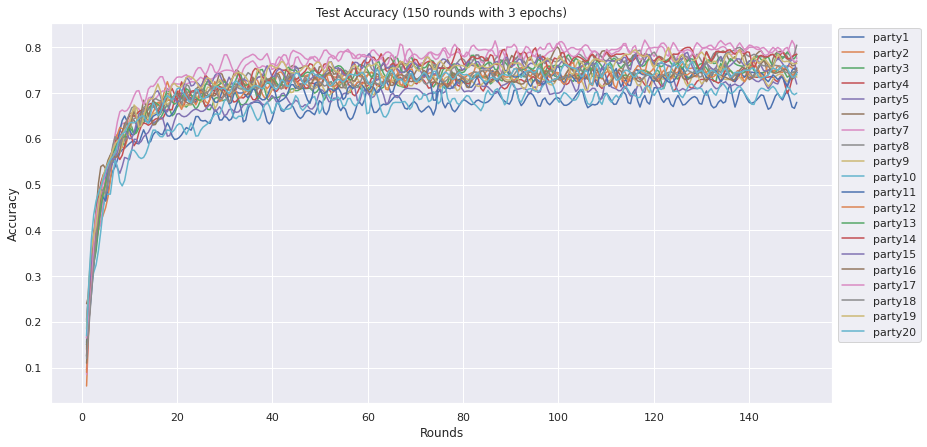

In [8]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

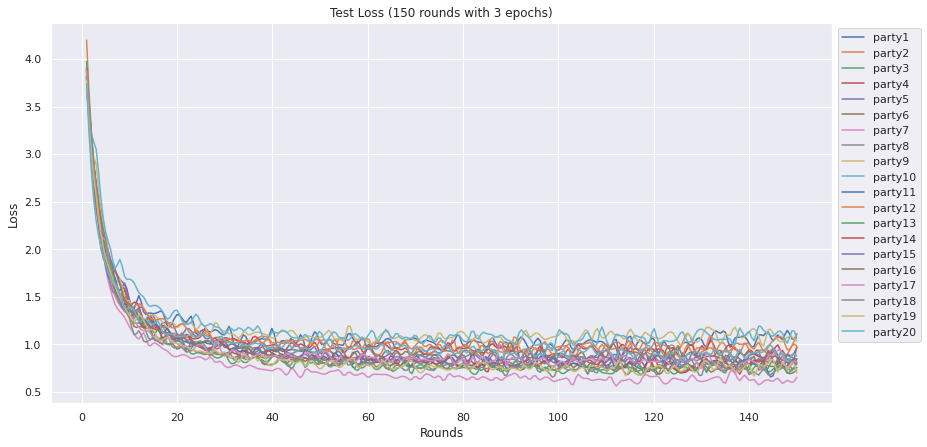

In [9]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

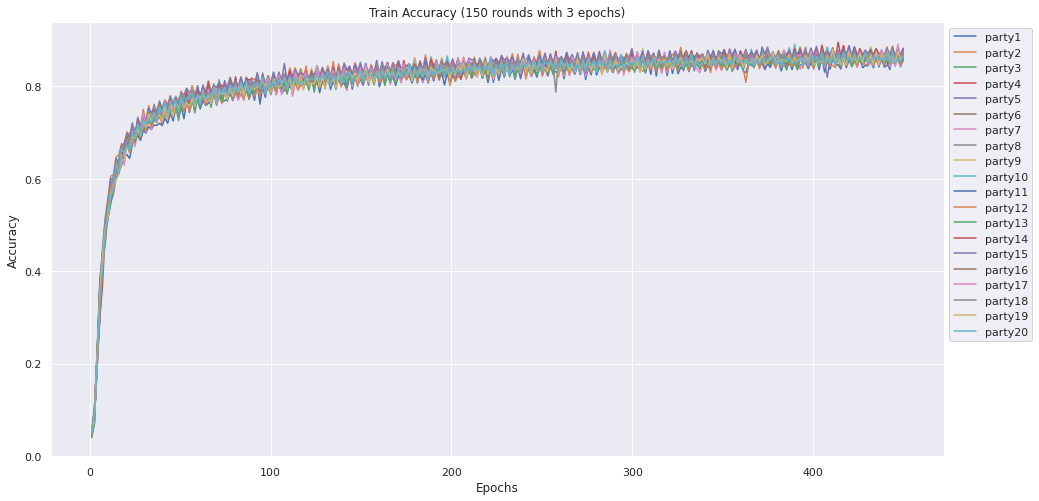

In [10]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

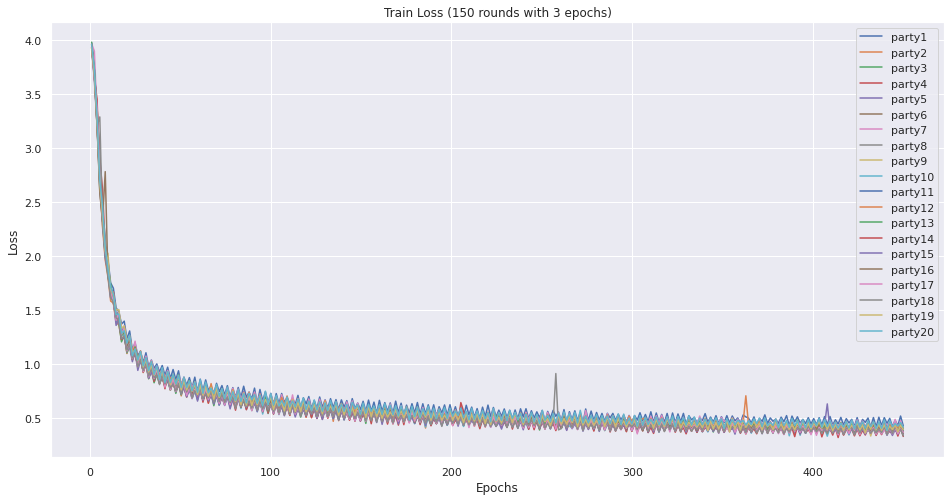

In [11]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [12]:
aggregator.model_synch()

2021-06-11T14:55:14.255Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-11T14:55:14.258Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7f97ab37dbe0>
2021-06-11T14:55:14.259Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:55:15.724Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T14:55:15.724Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:55:15.725Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:55:15.725Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [13]:
aggregator.eval_model()

2021-06-11T14:55:15.730Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-11T14:55:15.731Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:55:17.144Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T14:55:17.144Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:55:17.145Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:55:17.145Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-11T14:55:17.146Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [14]:
aggregator.save_model()

2021-06-11T14:55:17.151Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-11T14:55:17.154Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T14:55:20.169Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T14:55:20.169Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T14:55:20.170Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T14:55:20.170Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-11T14:55:20.171Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
